In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import csv

c:\Users\Shubham Garg\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4802 - loss: 0.8502
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4969 - loss: 0.7517
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5156 - loss: 0.7480
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5194 - loss: 0.7131
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5105 - loss: 0.6988
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5021 - loss: 0.7315
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5135 - loss: 0.7206
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5093 - loss: 0.7065
Epoch 9/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4725 - loss: 0.7200
Epoch 10/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5436 - loss: 0.6978
Epoch 11/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 0.7301
Epoch 12/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5156 - 

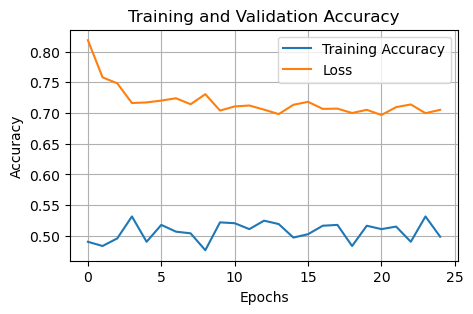

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
0.5737704918032787


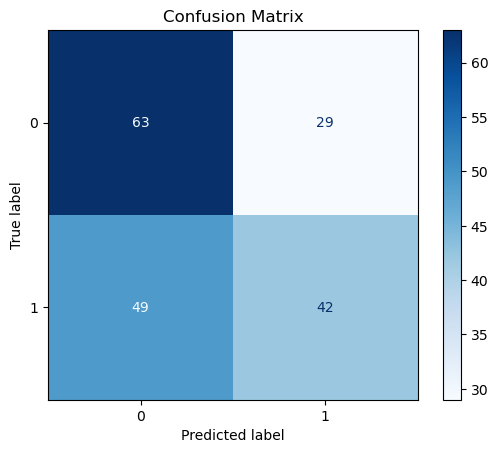

In [18]:
sequence_length = [30]
path = ['mod_Result_1h_data.csv','with_Indicator_1h_BTC_USDT.csv','1h']
with open('training_results.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write the header row to the CSV file
    csv_writer.writerow(['Path', 'Sequence Length', 'Epoch', 'Train Accuracy', 'Train Loss', 'Test Accuracy'])
    for seq in sequence_length:
        X, y = pre_processing(path[0],path[1], seq)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

        # Model output layer for 3 classes
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X.shape[1],)),
            BatchNormalization(),  # Normalize after first Dense
            Dropout(0.1),  # Dropout for regularization
            
            Dense(256, activation='relu'),
            BatchNormalization(),  # Normalize after second Dense
            Dropout(0.3),

            Dense(128, activation='relu'),
            
            Dense(64, activation='relu'),

            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            
            Dense(2, activation='softmax')  # Output layer for 3 classes
        ])

        # Compile with sparse categorical crossentropy
        model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=25, batch_size=32)
        for epoch in range(len(history.history['accuracy'])):
            csv_writer.writerow([
                path[2],  # Dataset identifier
                seq,         # Sequence length
                epoch + 1,   # Epoch number
                history.history['accuracy'][epoch],  # Training accuracy
                history.history['loss'][epoch],      # Training loss
                # history.history.get('val_accuracy', [None])[epoch],  # Validation accuracy (if available)
                # history.history.get('val_loss', [None])[epoch],      # Validation loss (if available)
                None
            ])
        plt.figure(figsize=(5,3))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['loss'], label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{path[2]}_{seq}_ann_plot.png', dpi=300, bbox_inches='tight')
        plt.show()

        y_pred = model.predict(X_test)
        y_pred_classes = y_pred.argmax(axis=1)
        cm = confusion_matrix(y_test, y_pred_classes)
        test_accuracy = accuracy_score(y_test, y_pred_classes)
        print(test_accuracy)
        csv_writer.writerow([
                path[2],
                seq,
                'Final',
                None,
                None,
                test_accuracy
            ])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(2))
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.savefig(f'{path[2]}_{seq}_ann_cm.png', dpi=300, bbox_inches="tight")
        plt.show()     